In [1]:
!pip install control
!pip install matplotlib
!pip install numpy
!pip install spicy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.1/455.1 kB 4.4 MB/s eta 0:00:00


In [2]:
#!git clone https://github.com/alchemyst/Skogestad-Python

!pip install "git+https://github.com/alchemyst/Skogestad-Python"

  Cloning https://github.com/alchemyst/Skogestad-Python to /tmp/pip-req-build-b0to5zkt
  Running command git clone --filter=blob:none --quiet https://github.com/alchemyst/Skogestad-Python /tmp/pip-req-build-b0to5zkt
  Resolved https://github.com/alchemyst/Skogestad-Python to commit bcdb6778a3b1adc0aed2d2f2864122c7da8f7fcd
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 120.7/120.7 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 49.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.0/66.0 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 377.6/377.6 kB 30.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.2/57.2 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.7/105.7 kB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 55.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 68.5 MB/s et

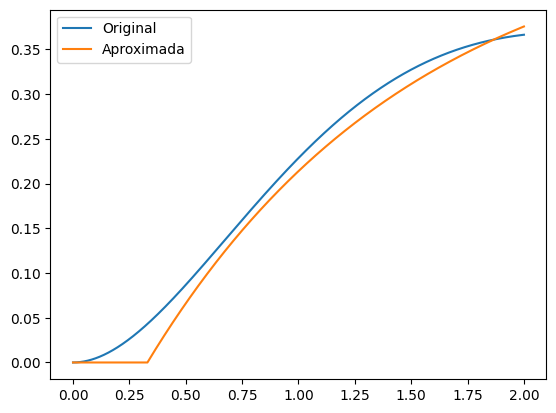

In [3]:
import robustcontrol
from robustcontrol import InternalDelay
from robustcontrol import utils
from robustcontrol.utils import tf
import matplotlib.pyplot as plt
import numpy as np
import control as ctl
from control import (TransferFunction, step_response, bode_plot,
                     impulse_response, series, feedback, rlocus,
                     margin, nyquist_plot)

sys = tf([1],[1,3,2]); # polos em -1 e -2 (sem oscilação)

K = 0.5;
L = 0.33;
tau = 1.2;
G = tf(K,[tau,1],deadtime = L) # aprox

sys_id = utils.InternalDelay.from_tf_coefficients([1], [1,2,3], [0])
G_id = utils.InternalDelay.from_tf_coefficients([K], [tau,1], [L])

#sys = InternalDelay(sys)
#G = InternalDelay(G)


t = np.linspace(0, 2, 5000)

y = sys_id.simulate(lambda t: [1], t)
ydelay = G_id.simulate(lambda t: [1], t)

plt.plot(t, y, t, ydelay)
plt.legend(['Original', 'Aproximada'])
#plt.axhline(1)

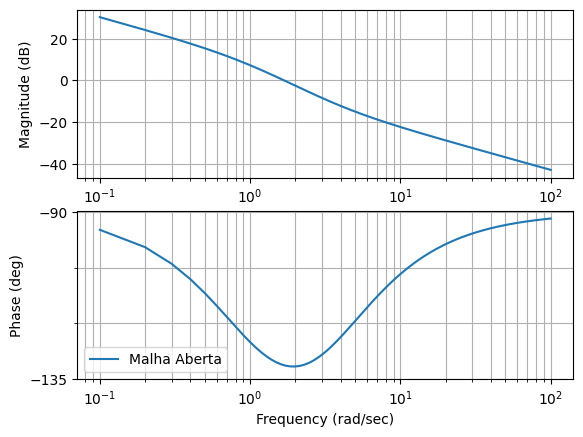

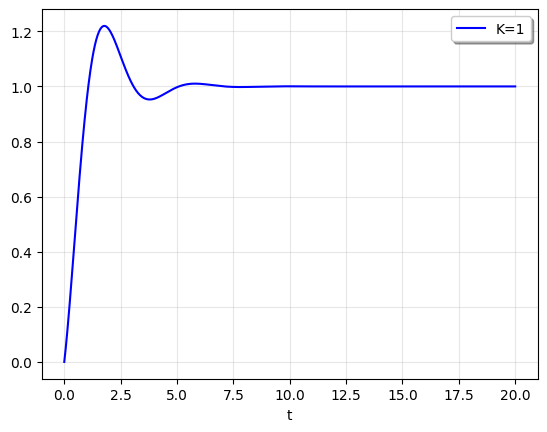

In [4]:
G = TransferFunction([1],[1,3,2]);
# PID por Ziegler Nichols
Cpid = TransferFunction(0.6*tau*np.convolve([1,1/0.33],[1,1/0.33]),[1,0]);
# Bode e Nyquist da Malha aberta
L = Cpid*G # malha aberta

MF = feedback(1*L, 1) # malha fechada

w = np.linspace(0.1, 100, 1001)

plt.figure(1)
mag, phase, omega = bode_plot(Cpid*G, omega=w, dB=True)
plt.legend(["Malha Aberta"])
plt.show

t = np.linspace(0, 20, 1001)

plt.figure(2)
tout, yout1 = step_response(MF, t, X0=0)
plt.plot(tout, yout1, 'b', linewidth=1.5, label='K=1')
plt.legend(loc='best', shadow=True, framealpha=1)
plt.grid(alpha=0.3)
plt.xlabel('t')
plt.show()


0.72 s^2 + 4.364 s + 6.612
--------------------------
    s^3 + 3 s^2 + 2 s



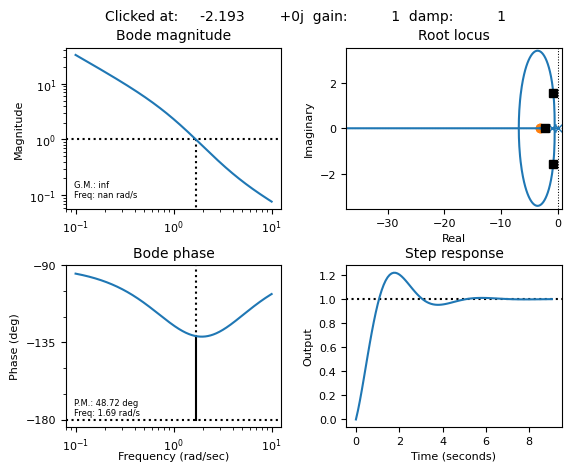

In [5]:
print(L)
ctl.sisotool(1*L)